# Fatemeh Saberi Khomami 

</br>

# Student Number: 400422114

</br>

# Advanced Artificial Intelligence Project

___________

### Import required libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygame
import sys

pygame 2.1.2 (SDL 2.0.18, Python 3.9.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Creating the grid Environment with its properties

In [13]:
class gridenv:
    def __init__(self):
        #initialize env properties
        self.width=20
        self.length=20
        #set locations for foods
        random.seed(41)
        row=random.sample([i for i in range(20)], 12)
        random.seed(23)
        col=random.sample([i for i in range(20)], 12)
        lst=list(zip(row,col))
        self.foods_location=lst[0:8]
        #set locations for agents
        self.agent1_current_location=lst[8]
        self.agent2_current_location=lst[9]
        self.agent3_current_location=lst[10]
        self.agent4_current_location=lst[11]
        self.agent1_current_cumulative_reward=0
        self.agent2_current_cumulative_reward=0
        self.agent3_current_cumulative_reward=0
        self.agent4_current_cumulative_reward=0
        #set of possible actions
        self.actions=['move_up','move_down','move_left','move_right','attack_up','attack_down','attack_left','attack_right']
    ####################################################################################################################
   #a method to track locations of agents and foods on map
    def on_map_vis(self,step=0,episode=0,param=0):
        b=np.zeros((20,20))
        for i in self.foods_location:
            b[i]=100
        for i in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
            b[i]=-100
        plt.ioff()
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        ax.set_title(f'Environment at episode {episode}, step {step}')
        plt.axis('off')
        plt.imshow(b,cmap=mpl.colors.ListedColormap(['red','#fffdc7','green']))
        plt.savefig(f'img/run{param}-ep{episode}-step{step}.png')
        plt.close(fig)

    
    ####################################################################################################################
    def plotenv(self,step=0):
        b=np.zeros((20,20))
        for i in self.foods_location:
            b[i]=100
        for i in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
            b[i]=-100
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        ax.set_title(f'Environment at step {step}')
        plt.imshow(b,cmap=mpl.colors.ListedColormap(['red','#fffdc7','green']))
        plt.axis('off')
        plt.show()
    ####################################################################################################################
    
    def take_step(self,action,agt):
        
        if agt==1:
            if action == 'move_up':
                curr_loc=(self.agent1_current_location[0]-1,self.agent1_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent1_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_location=curr_loc
                    
            
            elif action == 'attack_up':
                curr_loc=(self.agent1_current_location[0]-1,self.agent1_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent1_current_cumulative_reward+=2
                    idx=[self.agent2_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent2_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_cumulative_reward-=0.1
            
            elif action == 'move_down':
                curr_loc=(self.agent1_current_location[0]+1,self.agent1_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent1_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_location=curr_loc
            
            elif action == 'attack_down':
                curr_loc=(self.agent1_current_location[0]+1,self.agent1_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent1_current_cumulative_reward+=2
                    idx=[self.agent2_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent2_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_cumulative_reward-=0.1
                    
            elif action == 'move_left':
                curr_loc=(self.agent1_current_location[0],self.agent1_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    self.agent1_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_location=curr_loc
            
            elif action == 'attack_left':
                curr_loc=(self.agent1_current_location[0],self.agent1_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent1_current_cumulative_reward+=2
                    idx=[self.agent2_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent2_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_cumulative_reward-=0.1
                    
            
            elif action == 'move_right':
                curr_loc=(self.agent1_current_location[0],self.agent1_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    self.agent1_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_location=curr_loc
            
            elif action == 'attack_right':
                curr_loc=(self.agent1_current_location[0],self.agent1_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent2_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent1_current_cumulative_reward+=2
                    idx=[self.agent2_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent2_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent1_current_cumulative_reward-=0.1
                    
            else:
                print('INVALID ACTION')
                    
        if agt==2:
            if action == 'move_up':
                curr_loc=(self.agent2_current_location[0]-1,self.agent2_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent2_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_location=curr_loc
                    
            
            elif action == 'attack_up':
                curr_loc=(self.agent2_current_location[0]-1,self.agent2_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent2_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_cumulative_reward-=0.1
            
            elif action == 'move_down':
                curr_loc=(self.agent2_current_location[0]+1,self.agent2_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent2_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_location=curr_loc
            
            elif action == 'attack_down':
                curr_loc=(self.agent2_current_location[0]+1,self.agent2_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent2_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_cumulative_reward-=0.1
                    
            elif action == 'move_left':
                curr_loc=(self.agent2_current_location[0],self.agent2_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    self.agent2_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_location=curr_loc
            
            elif action == 'attack_left':
                curr_loc=(self.agent2_current_location[0],self.agent2_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent2_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_cumulative_reward-=0.1
                    
                    
            elif action == 'move_right':
                curr_loc=(self.agent2_current_location[0],self.agent2_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    self.agent2_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_location=curr_loc
            
            elif action == 'attack_right':
                curr_loc=(self.agent2_current_location[0],self.agent2_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent3_current_location,self.agent4_current_location]:
                    self.agent2_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent3_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent3_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent2_current_cumulative_reward-=0.1
             
            else:
                print('INVALID ACTION')  
                
        if agt==3:
            if action == 'move_up':
                curr_loc=(self.agent3_current_location[0]-1,self.agent3_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent3_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_location=curr_loc
                    
            
            elif action == 'attack_up':
                curr_loc=(self.agent3_current_location[0]-1,self.agent3_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    self.agent3_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_cumulative_reward-=0.1
            
            elif action == 'move_down':
                curr_loc=(self.agent3_current_location[0]+1,self.agent3_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent3_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_location=curr_loc
            
            elif action == 'attack_down':
                curr_loc=(self.agent3_current_location[0]+1,self.agent3_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    self.agent3_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_cumulative_reward-=0.1
                    
            elif action == 'move_left':
                curr_loc=(self.agent3_current_location[0],self.agent3_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    self.agent3_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_location=curr_loc
            
            elif action == 'attack_left':
                curr_loc=(self.agent3_current_location[0],self.agent3_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    self.agent3_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_cumulative_reward-=0.1
                    
                    
            elif action == 'move_right':
                curr_loc=(self.agent3_current_location[0],self.agent3_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    self.agent3_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_location=curr_loc
            
            elif action == 'attack_right':
                curr_loc=(self.agent3_current_location[0],self.agent3_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent4_current_location]:
                    self.agent3_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent4_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent4_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent3_current_cumulative_reward-=0.1
            else:
                print('INVALID ACTION')
                    
        if agt==4:
            if action == 'move_up':
                curr_loc=(self.agent4_current_location[0]-1,self.agent4_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent4_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_location=curr_loc
                    
            
            elif action == 'attack_up':
                curr_loc=(self.agent4_current_location[0]-1,self.agent4_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    self.agent4_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent3_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent3_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_cumulative_reward-=0.1
            
            elif action == 'move_down':
                curr_loc=(self.agent4_current_location[0]+1,self.agent4_current_location[1])
                
                if curr_loc in self.foods_location:
                    self.agent4_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    pass
                
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_location=curr_loc
            
            elif action == 'attack_down':
                curr_loc=(self.agent4_current_location[0]+1,self.agent4_current_location[1])
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    self.agent4_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent3_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent3_current_cumulative_reward-=4
                        
                elif curr_loc[0] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_cumulative_reward-=0.1
                    
            elif action == 'move_left':
                curr_loc=(self.agent4_current_location[0],self.agent4_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    self.agent4_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_location=curr_loc
            
            elif action == 'attack_left':
                curr_loc=(self.agent4_current_location[0],self.agent4_current_location[1]-1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    self.agent4_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent3_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent3_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_cumulative_reward-=0.1
                    
                    
            elif action == 'move_right':
                curr_loc=(self.agent4_current_location[0],self.agent4_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    self.agent4_current_cumulative_reward+=1
                    
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    pass
                
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_location=curr_loc
            
            elif action == 'attack_right':
                curr_loc=(self.agent4_current_location[0],self.agent4_current_location[1]+1)
                
                if curr_loc in self.foods_location:
                    pass
                
                elif curr_loc in [self.agent1_current_location,self.agent2_current_location,self.agent3_current_location]:
                    self.agent4_current_cumulative_reward+=2
                    idx=[self.agent1_current_location,self.agent2_current_location,self.agent3_current_location].index(curr_loc)
                    if idx==0:
                        self.agent1_current_cumulative_reward-=4
                    elif idx==1:
                        self.agent2_current_cumulative_reward-=4
                    else:
                        self.agent3_current_cumulative_reward-=4
                        
                elif curr_loc[1] not in list(range(20)):
                    pass
                
                else:
                    self.agent4_current_cumulative_reward-=0.1
            else:
                print('INVALID ACTION')

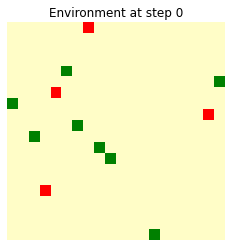

In [14]:
env=gridenv()
env.plotenv()

### Creating an agent class based on Q-learning algoritm

In [15]:
class Qlearner_agent:
    def __init__(self,environment, step_size=0.1, discount_factor=0.95,exploration_rate=0.1 ):
        self.environment=environment
        self.step_size=step_size
        self.discount_factor=discount_factor
        self.exploration_rate=exploration_rate
        self.q_table=dict()
        #initialize Q(s,a) values
        for x in range(environment.length):
            for y in range(environment.width):
                self.q_table[(x,y)]={'move_up':0, 'move_down':0, 'move_left':0, 'move_right':0 ,
                                     'attack_up':0, 'attack_down':0, 'attack_left':0, 'attack_right':0}     
       ################################################################################################# 
    def pick_action_agant1(self):
        if random.uniform(0,1)>self.exploration_rate:
            curr_Q=self.q_table[self.environment.agent1_current_location]
            max_action_val=max(curr_Q.values())
            action=random.choice([action for action,value in curr_Q.items() if value == max_action_val])
        else:
            action=random.choice(self.environment.actions)
        return action
    def pick_action_agant2(self):
        if random.uniform(0,1)>self.exploration_rate:
            curr_Q=self.q_table[self.environment.agent2_current_location]
            max_action_val=max(curr_Q.values())
            action=random.choice([action for action,value in curr_Q.items() if value == max_action_val])
        else:
            action=random.choice(self.environment.actions)
        return action
    def pick_action_agant3(self):
        if random.uniform(0,1)>self.exploration_rate:
            curr_Q=self.q_table[self.environment.agent3_current_location]
            max_action_val=max(curr_Q.values())
            action=random.choice([action for action,value in curr_Q.items() if value == max_action_val])
        else:
            action=random.choice(self.environment.actions)
        return action  
    def pick_action_agant4(self):
        if random.uniform(0,1)>self.exploration_rate:
            curr_Q=self.q_table[self.environment.agent4_current_location]
            max_action_val=max(curr_Q.values())
            action=random.choice([action for action,value in curr_Q.items() if value == max_action_val])
        else:
            action=random.choice(self.environment.actions)
        return action
    
    def learn(self,prev_loc,reward, new_loc, action):
        prev_Q_val=self.q_table[prev_loc][action]
        new_Qs = self.q_table[new_loc]
        max_of_new_Qs= max(new_Qs.values())
        self.q_table[prev_loc][action]= prev_Q_val + self.step_size*(reward + self.discount_factor*max_of_new_Qs - prev_Q_val)
        
    def update_exploration_rate(self, decay_rate, episode):
         self.exploration_rate=  self.exploration_rate *np.exp(-decay_rate*episode)
        

# Start training

In [16]:
def train(number_of_episodes,steps_per_episode, environment, agent1, agent2 ,agent3 ,agent4,param):
    rewards_of_all_episodes=[]

    for episode in range(number_of_episodes):

        agent1.update_exploration_rate(0.001, episode)
        agent2.update_exploration_rate(0.001, episode)
        agent3.update_exploration_rate(0.001, episode)
        agent4.update_exploration_rate(0.001, episode)
        
        for step in range(steps_per_episode):
            action1=agent1.pick_action_agant1()
            action2=agent2.pick_action_agant2()
            action3=agent3.pick_action_agant3()
            action4=agent4.pick_action_agant4()
        
            prev_cumulative_reward_1=environment.agent1_current_cumulative_reward
            prev_cumulative_reward_2=environment.agent2_current_cumulative_reward
            prev_cumulative_reward_3=environment.agent3_current_cumulative_reward
            prev_cumulative_reward_4=environment.agent4_current_cumulative_reward

            prev_loc1=environment.agent1_current_location
            prev_loc2=environment.agent2_current_location
            prev_loc3=environment.agent3_current_location
            prev_loc4=environment.agent4_current_location
            ###assign random priority of taking actions for agents at each time step
            b=[action1,action2,action3,action4]
            lst=[[b[i],i+1] for i in range(len(b)) ]
            random.shuffle(lst)
            for i in lst:
                environment.take_step(i[0],i[1])

            new_loc1=environment.agent1_current_location
            new_loc2=environment.agent2_current_location
            new_loc3=environment.agent3_current_location
            new_loc4=environment.agent4_current_location

            reward1=environment.agent1_current_cumulative_reward - prev_cumulative_reward_1
            reward2=environment.agent2_current_cumulative_reward - prev_cumulative_reward_2
            reward3=environment.agent3_current_cumulative_reward - prev_cumulative_reward_3
            reward4=environment.agent4_current_cumulative_reward - prev_cumulative_reward_4

            agent1.learn(prev_loc1,reward1,new_loc1,action1)
            agent2.learn(prev_loc2,reward2,new_loc2,action2)
            agent3.learn(prev_loc3,reward3,new_loc3,action3)
            agent4.learn(prev_loc4,reward4,new_loc4,action4)

            if episode==0:
                environment.on_map_vis(step,episode,param)
            if episode==20:
                environment.on_map_vis(step,episode,param)
            if episode==(number_of_episodes-1):
                environment.on_map_vis(step,episode,param)
        rewards_of_all_episodes.append([environment.agent1_current_cumulative_reward,
                                    environment.agent2_current_cumulative_reward,
                                    environment.agent3_current_cumulative_reward,
                                    environment.agent4_current_cumulative_reward])
        
        ###reset the environment after each episode
        if episode!=(number_of_episodes-1):
            environment.__init__()
    
    return rewards_of_all_episodes
        

In [17]:
def plot_av_reward(list_of_rewards,n_ep):
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    plt.plot(np.mean(list_of_rewards, axis=1), label='Average rewards of 4 agents after each episode')
    plt.xlabel("Episodes")
    plt.ylabel("Average reward",rotation=0, labelpad=40)
    plt.xlim(0,n_ep)
    plt.ylim(np.min(np.mean(list_of_rewards, axis=1)),np.max(np.mean(list_of_rewards, axis=1))+200)
    plt.legend()
    plt.show()


In [18]:
def plot_each_agent_reward(list_of_rewards,n_ep):
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    plt.plot([item[0] for item in list_of_rewards], label='Total reward of Agent 1 at each episode')
    plt.plot([item[1] for item in list_of_rewards], label='Total reward of Agent 2 at each episode')
    plt.plot([item[2] for item in list_of_rewards], label='Total reward of Agent 3 at each episode')
    plt.plot([item[3] for item in list_of_rewards], label='Total reward of Agent 4 at each episode')
    plt.xlabel("Episodes")
    plt.ylabel("Average reward",rotation=0, labelpad=40)
    plt.xlim(0,n_ep)
    plt.ylim(np.min(list_of_rewards),np.max(list_of_rewards)+200)
    plt.legend()
    plt.show()

In [19]:
def loc_agent(environment):
    print(f"Location of Agent 1 at the last episode and the last step: {environment.agent1_current_location}")
    print(f"Location of Agent 2 at the last episode and the last step: {environment.agent2_current_location}")
    print(f"Location of Agent 3 at the last episode and the last step: {environment.agent3_current_location}")
    print(f"Location of Agent 4 at the last episode and the last step: {environment.agent4_current_location}")

In [20]:
class Player(pygame.sprite.Sprite):
    def __init__(self, pos_x, pos_y,episode,steps_per_episode,param):
        super().__init__()
        self.param=param
        self.episode=episode-1
        self.steps_per_episode=steps_per_episode-1
        self.is_animating=False
        self.sprites=[]
        for i in range(self.steps_per_episode):
            self.sprites.append(pygame.image.load(f'img/run{self.param}-ep{self.episode}-step{i}.png'))
            
        self.current_sprite = 0
        self.image = self.sprites[self.current_sprite]
        self.rect = self.image.get_rect()
        
        self.rect.center = [pos_x,pos_y]
 
        
    def animate(self):
        self.is_animating=True
        
    def update(self,speed):
        if self.is_animating==True:
            self.current_sprite+=speed
            if self.current_sprite>=len(self.sprites):
                self.current_sprite=0
                self.is_animating=False
            self.image=self.sprites[int(self.current_sprite)]
        

In [21]:
   def animate_env(episode,steps_per_episode,speed=0.25,param=0) :
    #General setup
    pygame.init()
    clock = pygame.time.Clock()
    # Game Screen
    screen_width = 230
    screen_height = 240
    screen = pygame.display.set_mode((screen_width,screen_height))
    pygame.display.set_caption("Sprite Animation")

    # Creating the sprites and groups
    moving_sprites = pygame.sprite.Group()
    player = Player(112,120,episode,steps_per_episode,param)
    moving_sprites.add(player)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            if event.type == pygame.KEYDOWN:
                player.animate()

        # Drawing
        screen.fill((0,0,0))
        moving_sprites.draw(screen)
        moving_sprites.update(speed)
        pygame.display.flip()
        clock.tick(60)

____

# First Setting:
### learning rate: 0.1
### discount factor: 0.95
### epsilon: 0.2
### number of episodes: 100
### number of steps in each episode: 1000

In [40]:
environment=gridenv()

agent1 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.95,exploration_rate=0.2)
agent2 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.95,exploration_rate=0.2)
agent3 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.95,exploration_rate=0.2)
agent4 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.95,exploration_rate=0.2)

list_of_rewards1=train(100,1000, environment, agent1, agent2 ,agent3 ,agent4,1)

Let's take a look into the rewards of agents at each episode

In [41]:
list_of_rewards1

[[20.09999999999993,
  325.1000000000008,
  372.0999999999982,
  -17.599999999999973],
 [261.3000000000003,
  516.6999999999994,
  17.899999999999537,
  439.49999999999955],
 [586.5999999999997,
  227.10000000000008,
  663.5999999999989,
  266.20000000000067],
 [338.1999999999979, 531.1999999999986, 585.8999999999987, 213.60000000000016],
 [725.7999999999994, 659.2999999999992, 692.2999999999986, -10.19999999999998],
 [746.5999999999993, 721.2999999999993, 719.0999999999989, 486.2999999999996],
 [736.3999999999994, 637.0999999999995, 744.7999999999987, 594.6999999999998],
 [747.5999999999993, 729.5999999999991, 733.3999999999988, 705.5999999999992],
 [748.5999999999993, 726.3999999999988, 735.3999999999988, 707.5999999999991],
 [751.6999999999992, 728.3999999999988, 739.3999999999988, 709.6999999999992],
 [755.6999999999992, 729.4999999999989, 744.5999999999989, 717.9999999999991],
 [756.6999999999992, 732.6999999999988, 744.5999999999989, 718.9999999999991],
 [758.7999999999993, 741.7

In [42]:
loc_agent(environment)

Location of Agent 1 at the last episode and the last step: (6, 19)
Location of Agent 2 at the last episode and the last step: (10, 3)
Location of Agent 3 at the last episode and the last step: (4, 4)
Location of Agent 4 at the last episode and the last step: (3, 5)


###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [43]:
animate_env(1,1000,0.3,1)

SystemExit: 

c:\users\saberi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###### You can see the behaviours of agents and the dynamics of the environment over the 20th episode in the below animation.

In [44]:
animate_env(21,1000,0.3,1)

SystemExit: 

###### You can see the behaviours of agents and the dynamics of the environment over the LAST episode in the below animation.

In [45]:
animate_env(100,1000,0.3,1)

SystemExit: 

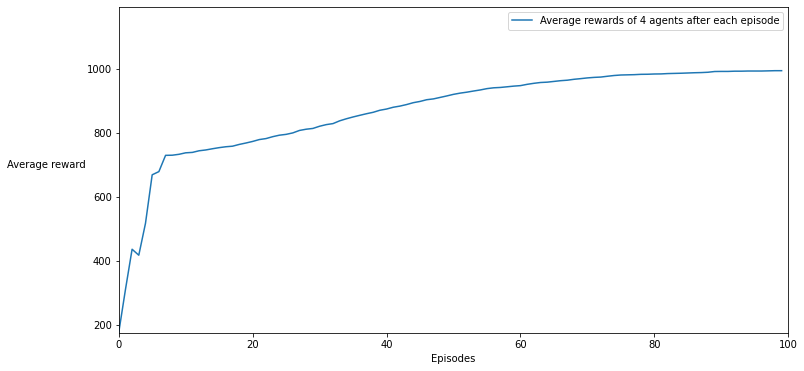

In [46]:
plot_av_reward(list_of_rewards1,100)

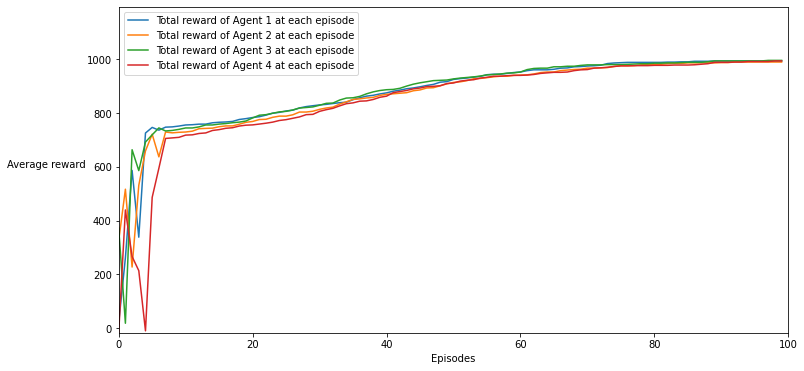

In [47]:
plot_each_agent_reward(list_of_rewards1,100)

___

# Second Setting:
### learning rate: 0.9 
### discount factor: 0.99
### epsilon: 0.2
### number of episodes: 100
### number of steps in each episdoe: 1000


In [48]:
environment=gridenv()

agent1 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.99,exploration_rate=0.2)
agent2 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.99,exploration_rate=0.2)
agent3 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.99,exploration_rate=0.2)
agent4 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.99,exploration_rate=0.2)

list_of_rewards2=train(100,1000, environment, agent1, agent2 ,agent3 ,agent4,2)

Let's take a look into the rewards of agents at each episode


In [49]:
list_of_rewards2

[[293.6, 147.30000000000132, 0.6000000000005303, 78.00000000000014],
 [493.99999999999983,
  615.4999999999991,
  372.00000000000057,
  36.89999999999978],
 [9.599999999999698,
  453.79999999999995,
  694.4999999999985,
  294.69999999999925],
 [-8.200000000000014,
  693.499999999999,
  723.4999999999986,
  -53.299999999999535],
 [350.0999999999999, 541.8999999999992, 709.5999999999989, 651.6999999999991],
 [502.49999999999966, 710.899999999999, 724.5999999999988, 693.8999999999991],
 [627.0999999999996, 704.2999999999988, 678.399999999999, 692.1999999999991],
 [710.4999999999994, 721.0999999999988, 708.2999999999989, 692.2999999999992],
 [748.5999999999993, 727.2999999999989, 726.2999999999988, 698.4999999999992],
 [751.6999999999992, 727.2999999999989, 730.2999999999988, 700.6999999999992],
 [755.6999999999992, 730.2999999999989, 735.4999999999989, 710.8999999999991],
 [756.6999999999992, 733.399999999999, 735.4999999999989, 711.9999999999991],
 [758.7999999999993, 740.4999999999989, 

In [50]:
loc_agent(environment)

Location of Agent 1 at the last episode and the last step: (6, 19)
Location of Agent 2 at the last episode and the last step: (11, 7)
Location of Agent 3 at the last episode and the last step: (4, 4)
Location of Agent 4 at the last episode and the last step: (4, 6)


###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [51]:
animate_env(1,1000,0.3,2)

SystemExit: 

c:\users\saberi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###### You can see the behaviours of agents and the dynamics of the environment over the 20th episode in the below animation.

In [52]:
animate_env(21,1000,0.3,2)

SystemExit: 

###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [53]:
animate_env(100,1000,0.3,2)

SystemExit: 

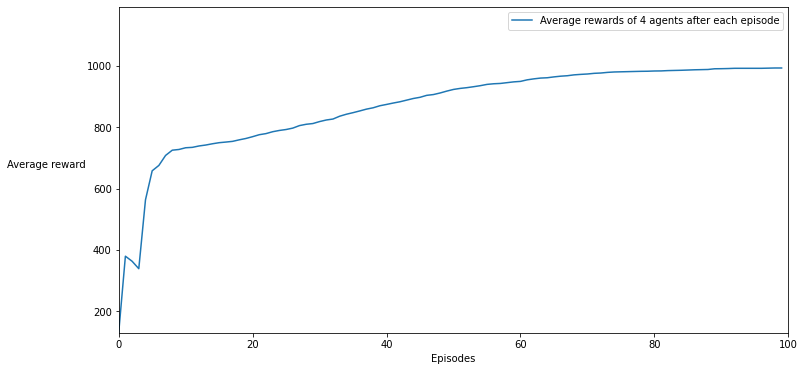

In [54]:
plot_av_reward(list_of_rewards2,100)

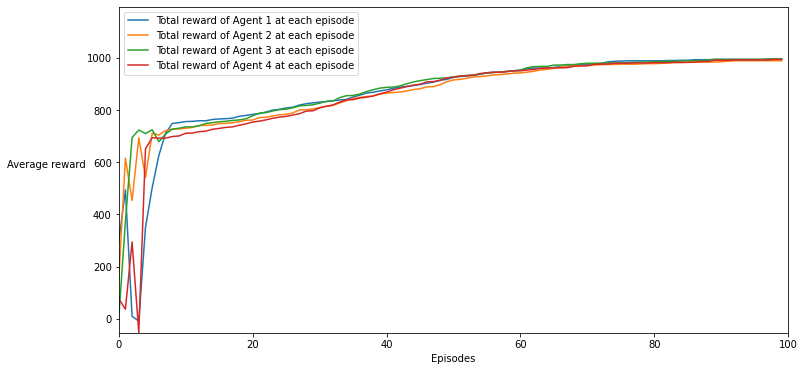

In [55]:
plot_each_agent_reward(list_of_rewards2,100)

____

# Third Setting:
### learning rate: 0.9
### discount factor: 0.8
### epsilon: 0.3
### number of episodes: 100
### number of steps in each episdoe: 1000


In [56]:
environment=gridenv()

agent1 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.8,exploration_rate=0.3)
agent2 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.8,exploration_rate=0.3)
agent3 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.8,exploration_rate=0.3)
agent4 = Qlearner_agent(environment, step_size=0.9, discount_factor=0.8,exploration_rate=0.3)

list_of_rewards3=train(100,1000, environment, agent1, agent2 ,agent3 ,agent4,3)

Let's take a look into the rewards of agents at each episode

In [57]:
list_of_rewards3

[[68.70000000000014, 251.5, 137.39999999999998, 11.899999999999952],
 [396.199999999999, 506.5999999999991, 624.3999999999993, 323.4999999999999],
 [489.999999999999, 568.3999999999992, 632.9999999999992, 572.7999999999992],
 [204.7000000000012, 532.1999999999995, 567.2999999999986, 392.0999999999981],
 [375.0000000000003, 574.7999999999992, 607.1999999999988, 313.79999999999745],
 [584.2999999999992, 637.7999999999993, 609.3999999999993, 515.8999999999987],
 [591.5999999999992, 635.8999999999992, 626.8999999999993, 553.0999999999992],
 [614.6999999999991, 673.7999999999989, 599.0999999999993, 559.0999999999991],
 [619.7999999999992, 678.199999999999, 650.3999999999992, 583.0999999999991],
 [620.8999999999992, 686.199999999999, 634.8999999999993, 571.2999999999992],
 [625.0999999999991, 693.3999999999991, 647.6999999999992, 604.4999999999991],
 [631.1999999999991, 697.3999999999991, 654.7999999999993, 606.5999999999991],
 [634.299999999999, 703.499999999999, 658.0999999999992, 611.8999

In [58]:
loc_agent(environment)

Location of Agent 1 at the last episode and the last step: (6, 19)
Location of Agent 2 at the last episode and the last step: (12, 8)
Location of Agent 3 at the last episode and the last step: (4, 4)
Location of Agent 4 at the last episode and the last step: (3, 5)


###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [59]:
animate_env(1,1000,0.3,3)

SystemExit: 

c:\users\saberi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###### You can see the behaviours of agents and the dynamics of the environment over the 20th episode in the below animation.

In [60]:
animate_env(21,1000,0.3,3)

SystemExit: 

###### You can see the behaviours of agents and the dynamics of the environment over the  episode in the below animation.

In [61]:
animate_env(100,1000,0.3,3)

SystemExit: 

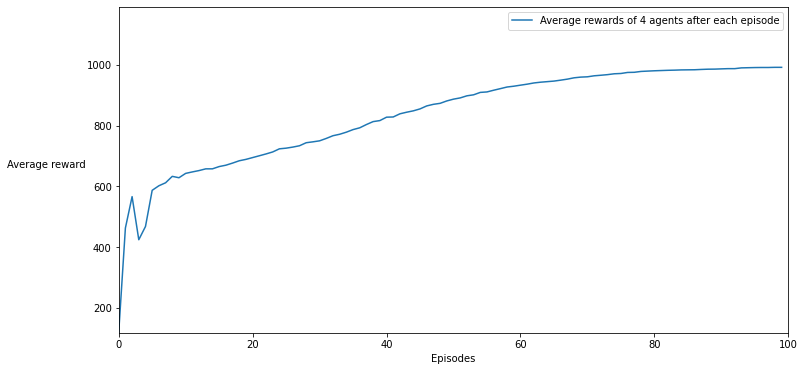

In [62]:
plot_av_reward(list_of_rewards3,100)

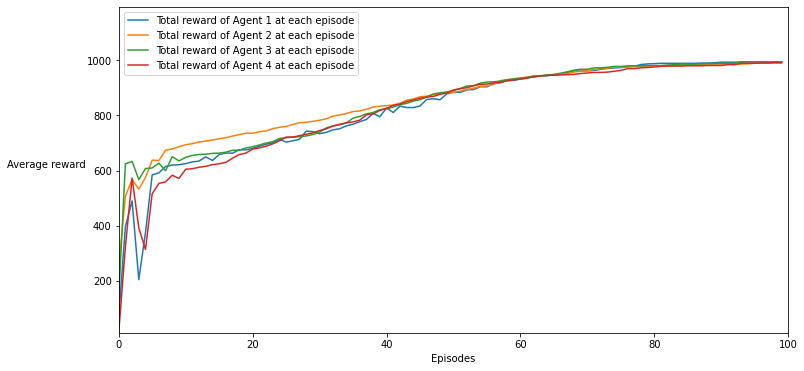

In [63]:
plot_each_agent_reward(list_of_rewards3,100)

______

# Forth Setting:
### learning rate: 0.5
### discount factor: 0.99
### epsilon: 0.1
### number of episodes: 100
### number of steps in each episdoe: 1000


In [22]:
environment=gridenv()

agent1 = Qlearner_agent(environment, step_size=0.5, discount_factor=0.99,exploration_rate=0.1)
agent2 = Qlearner_agent(environment, step_size=0.5, discount_factor=0.99,exploration_rate=0.1)
agent3 = Qlearner_agent(environment, step_size=0.5, discount_factor=0.99,exploration_rate=0.1)
agent4 = Qlearner_agent(environment, step_size=0.5, discount_factor=0.99,exploration_rate=0.1)

list_of_rewards4=train(100,1000, environment, agent1, agent2 ,agent3 ,agent4,4)

Let's take a look into the rewards of agents at each episode

In [23]:
list_of_rewards4

[[544.6999999999983, 200.00000000000014, 793.0999999999997, 795.4999999999997],
 [731.2999999999996, 833.2999999999993, 838.5999999999992, 552.5999999999998],
 [372.4999999999981, 552.9999999999997, 867.0999999999993, -62.70000000000018],
 [852.2999999999995, 838.0999999999991, 790.0999999999996, 561.0999999999998],
 [850.3999999999995, 833.3999999999992, 858.1999999999994, 844.2999999999995],
 [849.2999999999995, 835.3999999999992, 859.2999999999994, 845.2999999999995],
 [850.3999999999995, 844.8999999999992, 863.2999999999994, 846.3999999999995],
 [850.3999999999995, 844.8999999999992, 864.2999999999994, 846.3999999999995],
 [852.3999999999995, 844.8999999999992, 866.4999999999994, 850.4999999999995],
 [854.3999999999995, 846.8999999999992, 866.4999999999994, 850.4999999999995],
 [854.3999999999995, 847.9999999999992, 866.4999999999994, 854.4999999999995],
 [856.3999999999995, 851.0999999999992, 868.6999999999995, 856.4999999999995],
 [856.3999999999995, 851.0999999999992, 868.699999

In [25]:
loc_agent(environment)

Location of Agent 1 at the last episode and the last step: (5, 18)
Location of Agent 2 at the last episode and the last step: (11, 7)
Location of Agent 3 at the last episode and the last step: (5, 5)
Location of Agent 4 at the last episode and the last step: (3, 5)


###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [26]:
animate_env(1,1000,0.3,4)

SystemExit: 

c:\users\saberi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###### You can see the behaviours of agents and the dynamics of the environment over the 20th episode in the below animation.

In [27]:
animate_env(21,1000,0.3,4)

SystemExit: 

###### You can see the behaviours of agents and the dynamics of the environment over the LAST episode in the below animation.

In [28]:
animate_env(100,1000,0.3,4)

SystemExit: 

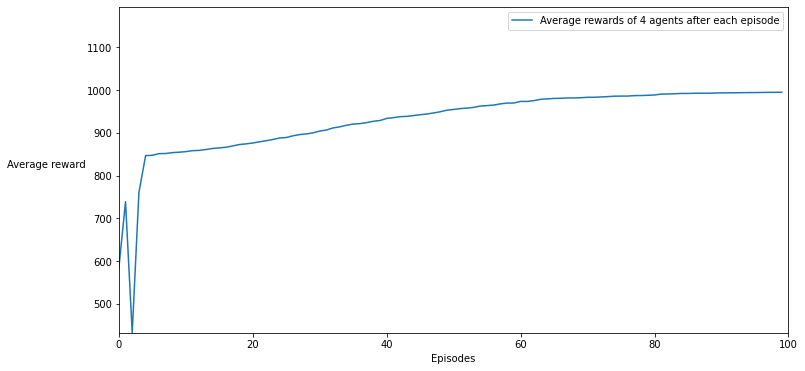

In [29]:
plot_av_reward(list_of_rewards4,100)

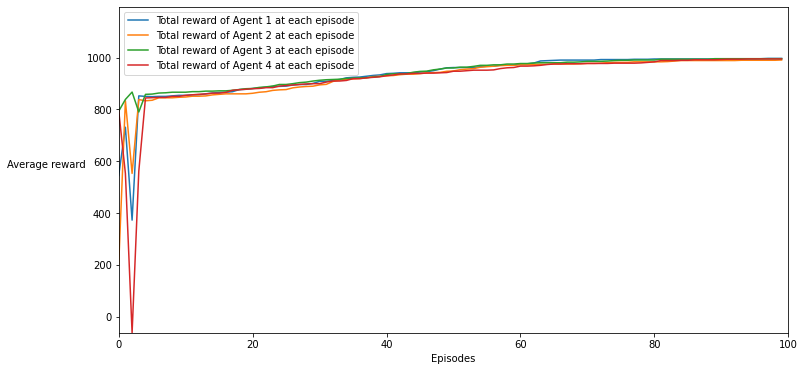

In [30]:
plot_each_agent_reward(list_of_rewards4,100)

______

# Fifth Setting:
### learning rate: 0.1
### discount factor: 0.99
### epsilon: 0.1
### number of episodes: 100
### number of steps in each episdoe: 1000


In [31]:
environment=gridenv()

agent1 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.99,exploration_rate=0.1)
agent2 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.99,exploration_rate=0.1)
agent3 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.99,exploration_rate=0.1)
agent4 = Qlearner_agent(environment, step_size=0.1, discount_factor=0.99,exploration_rate=0.1)

list_of_rewards5=train(100,1000, environment, agent1, agent2 ,agent3 ,agent4,5)

Let's take a look into the rewards of agents at each episode

In [32]:
list_of_rewards5

[[512.0999999999973, 158.60000000000005, 793.1999999999997, 806.9999999999998],
 [505.9999999999997, 109.70000000000141, 789.6999999999996, 593.6999999999986],
 [710.3999999999996, 849.5999999999995, 303.80000000000007, 904.8999999999995],
 [532.0999999999999, 755.5999999999992, 867.4999999999994, 824.0999999999995],
 [837.8999999999995, 847.3999999999995, 862.2999999999994, 836.1999999999995],
 [844.0999999999996, 841.2999999999995, 858.1999999999994, 833.1999999999996],
 [845.2999999999995, 841.5999999999996, 861.2999999999994, 840.4999999999995],
 [808.8999999999995, 849.8999999999995, 861.0999999999993, 837.4999999999995],
 [852.3999999999995, 848.8999999999995, 866.4999999999994, 842.4999999999995],
 [854.3999999999995, 848.8999999999995, 866.4999999999994, 842.4999999999995],
 [854.3999999999995, 851.9999999999995, 866.4999999999994, 844.4999999999995],
 [856.3999999999995, 855.0999999999996, 868.6999999999995, 848.4999999999995],
 [856.3999999999995, 861.0999999999996, 868.69999

In [33]:
loc_agent(environment)

Location of Agent 1 at the last episode and the last step: (5, 18)
Location of Agent 2 at the last episode and the last step: (13, 9)
Location of Agent 3 at the last episode and the last step: (5, 5)
Location of Agent 4 at the last episode and the last step: (3, 5)


###### You can see the behaviours of agents and the dynamics of the environment over the FIRST episode in the below animation.

In [34]:
animate_env(1,1000,0.3,5)

SystemExit: 

c:\users\saberi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###### You can see the behaviours of agents and the dynamics of the environment over the 20th episode in the below animation.

In [35]:
animate_env(21,1000,0.3,5)

SystemExit: 

###### You can see the behaviours of agents and the dynamics of the environment over the LAST episode in the below animation.

In [36]:
animate_env(100,1000,0.3,5)

SystemExit: 

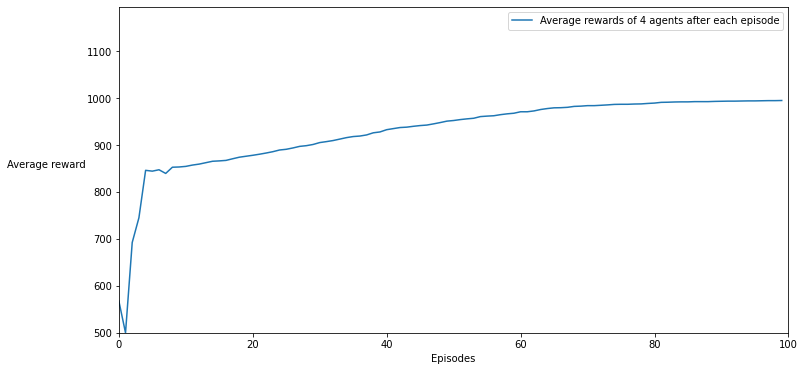

In [37]:
plot_av_reward(list_of_rewards5,100)

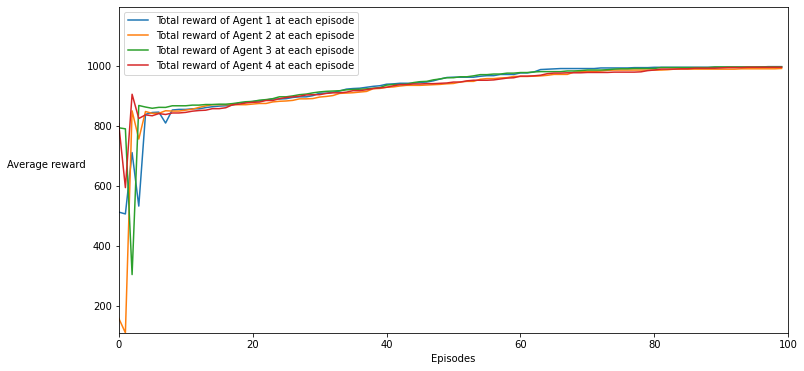

In [38]:
plot_each_agent_reward(list_of_rewards5,100)

_______

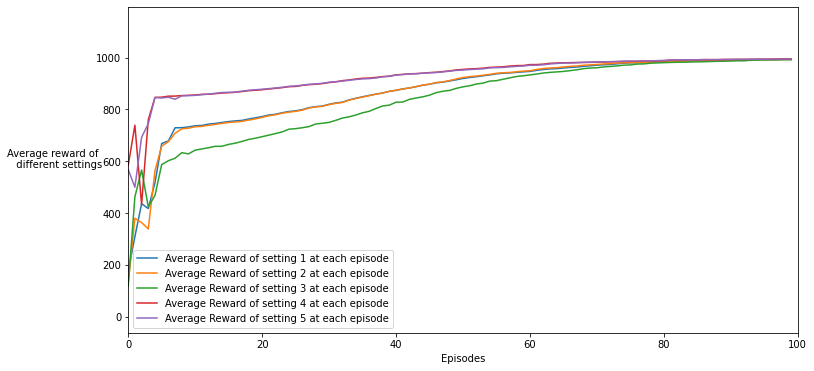

In [64]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(np.mean(list_of_rewards1, axis=1), label='Average Reward of setting 1 at each episode')
plt.plot(np.mean(list_of_rewards2, axis=1), label='Average Reward of setting 2 at each episode')
plt.plot(np.mean(list_of_rewards3, axis=1), label='Average Reward of setting 3 at each episode')
plt.plot(np.mean(list_of_rewards4, axis=1), label='Average Reward of setting 4 at each episode')
plt.plot(np.mean(list_of_rewards5, axis=1), label='Average Reward of setting 5 at each episode')
plt.xlabel("Episodes")
plt.ylabel("Average reward of  \n  different settings",rotation=0, labelpad=40)
plt.xlim(0,100)
plt.ylim(np.min([list_of_rewards1,list_of_rewards2,list_of_rewards3,list_of_rewards4,list_of_rewards5]),
         np.max([list_of_rewards1,list_of_rewards2,list_of_rewards3,list_of_rewards4,list_of_rewards5])+200)
plt.legend()
plt.show()


##### You can see the amazing result of Q-learning in the above plot. All the settings converged, even if some of the settings made the agent act suboptimally.